In [1]:
# Set Up the Database

import sqlite3

conn = sqlite3.connect('studentgrades.db')
print("Opened database successfully")

Opened database successfully


In [2]:
# creating cursor

cursor = conn.cursor()
print("Cursor created!")

# Create the sales table

cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
  student_id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT,
  last_name TEXT
)
''')

print("students table created!")

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT,
  grade INTEGER,
  FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

print("grades table created!")

Cursor created!
students table created!
grades table created!


In [3]:
# Insert Data into the Tables

students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name)
VALUES (?, ?, ?)
''', students_data)

# Commit the transaction
conn.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [4]:
# Insert Data into the Tables

grades_data = [
    (1, 1, 'Math', 95),
    (2, 1, 'English', 88),
    (3, 1, 'History', 90),
    (4, 2, 'Math', 82),
    (5, 2, 'English', 76),
    (6, 2, 'History', 85),
    (7, 3, 'Math', 92),
    (8, 3, 'English', 89),
    (9, 3, 'History', 93),
    (10, 4, 'Math', 78),
    (11, 4, 'English', 91),
    (12, 4, 'History', 87),
    (13, 5, 'Math', 94),
    (14, 5, 'English', 86),
    (15, 5, 'History', 91)
]

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade)
VALUES (?, ?, ?, ?)
''', grades_data)

# Commit the transaction
conn.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [5]:
# Perform SQL Queries

# 1. Retrieve all students' names and their grades

cursor.execute('''
SELECT first_name, last_name, grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

results_one = cursor.fetchall()

for row in results_one:
    print(row)

('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 92)
('Carol', 'White', 89)
('Carol', 'White', 93)
('David', 'Brown', 78)
('David', 'Brown', 91)
('David', 'Brown', 87)
('Eve', 'Davis', 94)
('Eve', 'Davis', 86)
('Eve', 'Davis', 91)


In [6]:
# 2. Find the average grade for each student

cursor.execute('''
SELECT first_name, last_name, AVG(grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

results_two = cursor.fetchall()

for two in results_two:
    print(two)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 91.33333333333333)
('David', 'Brown', 85.33333333333333)
('Eve', 'Davis', 90.33333333333333)


In [7]:
# 3. Find the student with the highest average grade

cursor.execute('''
SELECT first_name, last_name, AVG(grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
''')

results_three = cursor.fetchall()

for three in results_three:
    print(three)

('Carol', 'White', 91.33333333333333)


In [8]:
# 4. Find the average grade for the Math subject

cursor.execute('''
SELECT AVG(grade) AS average_math_grade
FROM grades
WHERE subject = 'Math'
''')

results_four = cursor.fetchall()

for four in results_four:
    print(four)

(88.2,)


In [9]:
# 5. List all students who scored above 90 in any subject

cursor.execute('''
SELECT first_name, last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grade > 90
GROUP BY students.student_id
''')

results_five = cursor.fetchall()

for five in results_five:
    print(five)

('Alice', 'Johnson')
('Carol', 'White')
('David', 'Brown')
('Eve', 'Davis')


In [10]:
# Load Data into Pandas

import pandas as pd

students_df = pd.read_sql_query("SELECT * FROM students", conn)
grades_df = pd.read_sql_query("SELECT * FROM grades", conn)

print(students_df)
print(grades_df)

   student_id first_name last_name
0           1      Alice   Johnson
1           2        Bob     Smith
2           3      Carol     White
3           4      David     Brown
4           5        Eve     Davis
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     92
7          8           3  English     89
8          9           3  History     93
9         10           4     Math     78
10        11           4  English     91
11        12           4  History     87
12        13           5     Math     94
13        14           5  English     86
14        15           5  History     91


In [11]:
# Use JOIN queries to combine the data from both tables into a single DataFrame that
# includes each student's name, subject, and grade

query = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
'''

combined_df = pd.read_sql_query(query, conn)

print(combined_df)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     92
7       Carol     White  English     89
8       Carol     White  History     93
9       David     Brown     Math     78
10      David     Brown  English     91
11      David     Brown  History     87
12        Eve     Davis     Math     94
13        Eve     Davis  English     86
14        Eve     Davis  History     91


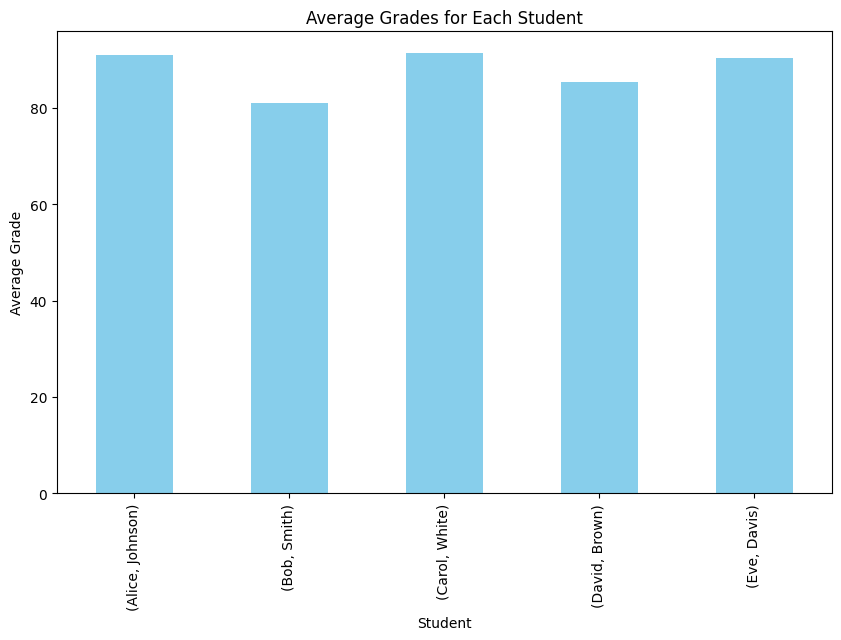

In [13]:
# 3. Visualize the data with Matplotlib:
  # Plot the average grades for each student.

import matplotlib.pyplot as plt

average_grades = combined_df.groupby(['first_name', 'last_name'])['grade'].mean()

plt.figure(figsize=(10,6))
average_grades.plot(kind='bar', color='skyblue')
plt.ylabel('Average Grade')
plt.xlabel('Student')
plt.title('Average Grades for Each Student')
plt.show()

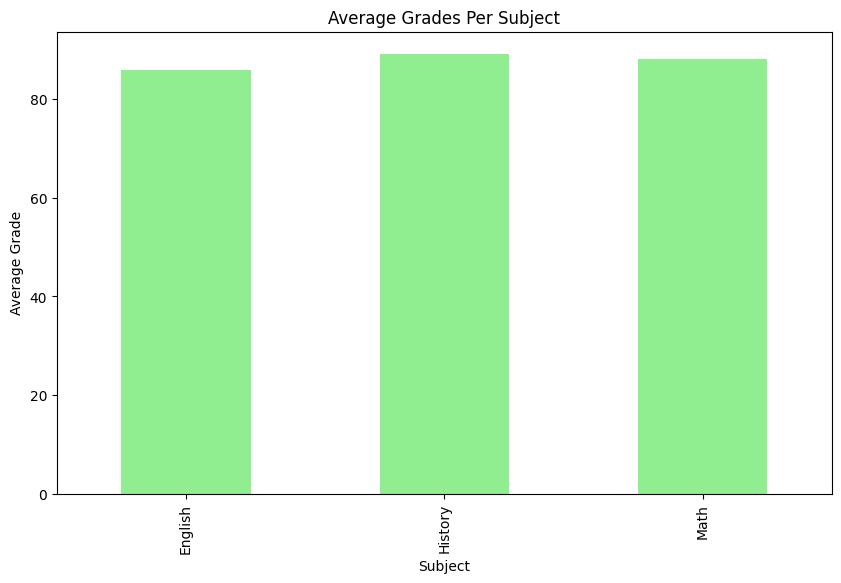

In [14]:
# 3. Visualize the data with Matplotlib:
  # Create a bar chart showing the average grade for each subject.

average_grades = combined_df.groupby(['subject'])['grade'].mean()

plt.figure(figsize=(10,6))
average_grades.plot(kind='bar', color='lightgreen')
plt.ylabel('Average Grade')
plt.xlabel('Subject')
plt.title('Average Grades Per Subject')
plt.show()